In [0]:
from google.colab import files
files.upload()

Saving test_image.pkl to test_image.pkl
Saving train_image.pkl to train_image.pkl
Saving train_label.pkl to train_label.pkl
Saving visualize.py to visualize.py


In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#Visualization
from visualize import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#To convert Y to one-hot-vector notation
from keras.utils import np_utils

#Used for CNN Model
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, ZeroPadding2D
from keras import optimizers

#Create training and testing data
from sklearn.model_selection import train_test_split

#
from keras.callbacks import ModelCheckpoint

#
import csv

In [0]:
with open('train_image.pkl', 'rb') as f:
    X = pickle.load(f)

X = np.array(X)

In [53]:
print(type(X))
print(len(X))

<class 'numpy.ndarray'>
8000


In [0]:
with open('train_label.pkl', 'rb') as f:
    Y = pickle.load(f)

Y = np.array(Y)

In [55]:
print(len(Y))
print(np.unique(Y, return_counts=True))

8000
(array([0, 2, 3, 6]), array([2000, 2000, 2000, 2000]))


In [56]:
Y = np.ceil(np.divide(Y,2))
classes = np.unique(Y)
print(np.unique(Y, return_counts=True))

(array([0., 1., 2., 3.]), array([2000, 2000, 2000, 2000]))


In [0]:
with open('test_image.pkl', 'rb') as f:
    XTest = pickle.load(f)

XTest = np.array(XTest)

In [58]:
print(len(XTest))

2000


In [59]:
print(X.shape, Y.shape)

(8000, 784) (8000,)


In [60]:
# Since CNN accepts input in the form of images therefore we reshape our training data
X = X.reshape((-1,28,28,1))
Y = np_utils.to_categorical(Y)

print(X.shape, Y.shape)

(8000, 28, 28, 1) (8000, 4)


In [0]:
def drawImage(img):
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.show()

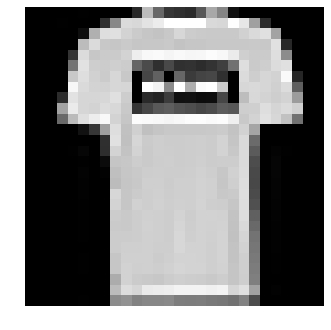

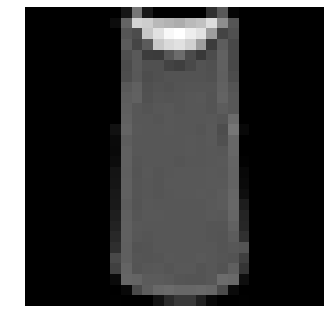

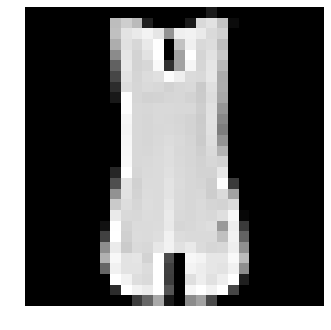

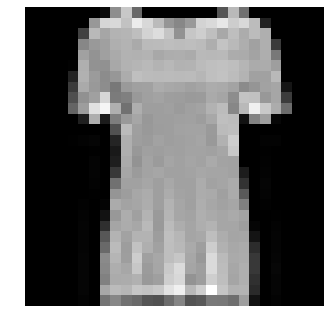

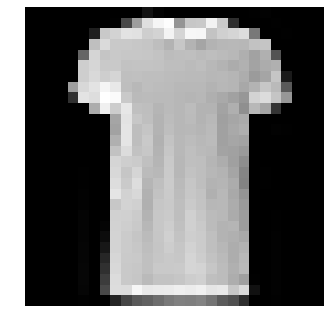

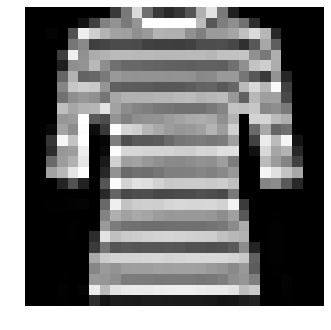

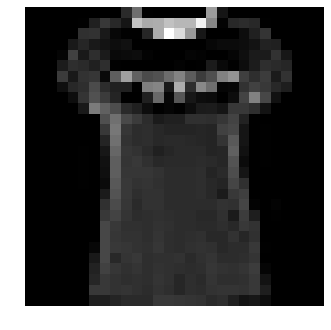

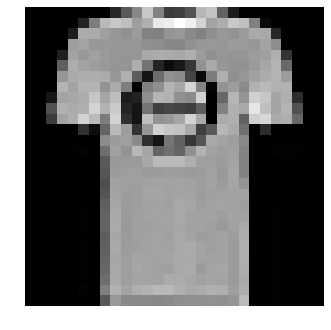

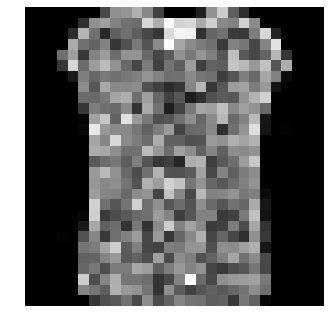

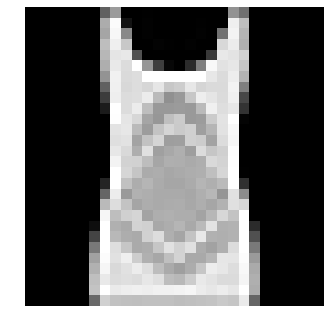

In [62]:
for i in range(10):
    drawImage(np.array(X[i]))

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42, shuffle=True, stratify=Y)

In [64]:
print(type(X_train))
print(len(X_train))

<class 'numpy.ndarray'>
6800


In [65]:
#A simple CNN model with basic layers
model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))  #Input size is provided only in the first layer
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
flatten_7 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 51204     
Total para

In [0]:
## Optimizer
adam = optimizers.adam(lr=1e-4)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [68]:
hist = model.fit(X_train, Y_train, epochs=100, batch_size=256, validation_data=(X_test, Y_test))

Train on 6800 samples, validate on 1200 samples
Epoch 1/100
6800/6800 [==============================] - 2s 279us/step - loss: 5.6341 - acc: 0.4944 - val_loss: 3.2321 - val_acc: 0.6575
Epoch 2/100
6800/6800 [==============================] - 1s 161us/step - loss: 2.5077 - acc: 0.6449 - val_loss: 1.3442 - val_acc: 0.7017
Epoch 3/100
6800/6800 [==============================] - 1s 163us/step - loss: 1.4275 - acc: 0.7159 - val_loss: 1.0999 - val_acc: 0.7433
Epoch 4/100
6800/6800 [==============================] - 1s 164us/step - loss: 1.1715 - acc: 0.7400 - val_loss: 0.7780 - val_acc: 0.7792
Epoch 5/100
6800/6800 [==============================] - 1s 164us/step - loss: 0.9957 - acc: 0.7603 - val_loss: 0.7556 - val_acc: 0.7900
Epoch 6/100
6800/6800 [==============================] - 1s 164us/step - loss: 0.8861 - acc: 0.7772 - val_loss: 0.7315 - val_acc: 0.7742
Epoch 7/100
6800/6800 [==============================] - 1s 163us/step - loss: 0.8376 - acc: 0.7807 - val_loss: 0.6568 - val_acc: 

In [69]:
hist = model.fit(X_train, Y_train, epochs=200, batch_size=256, validation_data=(X_test, Y_test))

Train on 6800 samples, validate on 1200 samples
Epoch 1/200
6800/6800 [==============================] - 1s 177us/step - loss: 0.0510 - acc: 0.9846 - val_loss: 0.5100 - val_acc: 0.8575
Epoch 2/200
6800/6800 [==============================] - 1s 162us/step - loss: 0.0463 - acc: 0.9849 - val_loss: 0.5281 - val_acc: 0.8550
Epoch 3/200
6800/6800 [==============================] - 1s 163us/step - loss: 0.0507 - acc: 0.9818 - val_loss: 0.4925 - val_acc: 0.8592
Epoch 4/200
6800/6800 [==============================] - 1s 163us/step - loss: 0.0543 - acc: 0.9794 - val_loss: 0.5159 - val_acc: 0.8600
Epoch 5/200
6800/6800 [==============================] - 1s 166us/step - loss: 0.0423 - acc: 0.9869 - val_loss: 0.5124 - val_acc: 0.8558
Epoch 6/200
6800/6800 [==============================] - 1s 165us/step - loss: 0.0429 - acc: 0.9860 - val_loss: 0.5221 - val_acc: 0.8500
Epoch 7/200
6800/6800 [==============================] - 1s 164us/step - loss: 0.0451 - acc: 0.9871 - val_loss: 0.5090 - val_acc: 

In [0]:
score, accuracy = model.evaluate(X_test, Y_test)
print('Score: ', score.round(4))
print('Accuracy: ', accuracy.round(4)*100, '%')

1200/1200 [==============================] - 0s 159us/step
Score:  0.6
Accuracy:  87.33 %


In [0]:
Y_pred_ohv = model.predict(X_test)
Y_pred = np.argmax(Y_pred_ohv, axis=1)

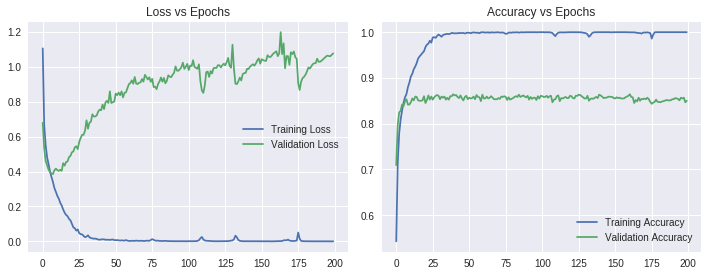

In [87]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Loss vs Epochs')
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy vs Epochs')
plt.plot(hist.history['acc'], label='Training Accuracy')
plt.plot(hist.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Confusion matrix, without normalization
[[263   4   5  28]
 [ 10 259   6  25]
 [  8   3 283   6]
 [ 32  13  12 243]]


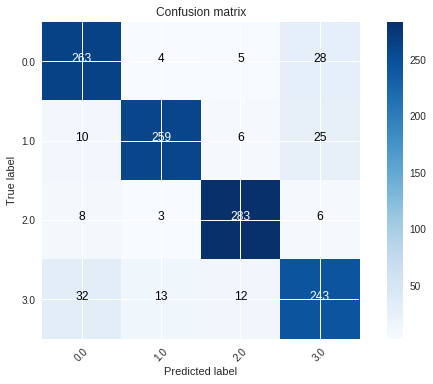

In [0]:
# Convert validation observations from one hot vectors to labels
Y_test_cnf = np.argmax(Y_test, axis=1)

#Plotting the confusion matrix
cnf_matrix = confusion_matrix(Y_test_cnf, Y_pred)
plot_confusion_matrix(cnf_matrix, classes=classes)

In [103]:
model_improved = Sequential()
model_improved.add(BatchNormalization(input_shape=(28,28,1)))
model_improved.add(Convolution2D(64, (4, 4), activation='relu'))
model_improved.add(MaxPooling2D(2, 2))
model_improved.add(Dropout(0.1))
    
# Conv + Maxpooling
model_improved.add(Convolution2D(64, (4, 4), activation='relu'))
model_improved.add(MaxPooling2D(2, 2))

# Dropout
model_improved.add(Dropout(0.3))

# Converting 3D feature to 1D feature Vektor
model_improved.add(Flatten())

# Fully Connected Layer
model_improved.add(Dense(256, activation='relu'))

# Dropout
model_improved.add(Dropout(0.5))
    
# Fully Connected Layer
model_improved.add(Dense(64, activation='relu'))
    
# Normalization
model_improved.add(BatchNormalization())

model_improved.add(Dense(4, activation='softmax'))

model_improved.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_16 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 9, 9, 64)          65600     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 4, 4, 64)          0         
__________

In [0]:
model_improved.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [86]:
hist_improved = model_improved.fit(X_train, Y_train, epochs=200, batch_size=256, validation_data=(X_test, Y_test))

Train on 6800 samples, validate on 1200 samples
Epoch 1/200
6800/6800 [==============================] - 2s 344us/step - loss: 1.2314 - acc: 0.5006 - val_loss: 0.8496 - val_acc: 0.6533
Epoch 2/200
6800/6800 [==============================] - 1s 111us/step - loss: 0.8398 - acc: 0.6488 - val_loss: 0.6895 - val_acc: 0.7083
Epoch 3/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.7370 - acc: 0.6876 - val_loss: 0.6514 - val_acc: 0.7542
Epoch 4/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.6674 - acc: 0.7196 - val_loss: 0.5996 - val_acc: 0.7875
Epoch 5/200
6800/6800 [==============================] - 1s 109us/step - loss: 0.6240 - acc: 0.7440 - val_loss: 0.5674 - val_acc: 0.7875
Epoch 6/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.5940 - acc: 0.7590 - val_loss: 0.5317 - val_acc: 0.7967
Epoch 7/200
6800/6800 [==============================] - 1s 112us/step - loss: 0.5694 - acc: 0.7706 - val_loss: 0.5117 - val_acc: 

In [42]:
score, accuracy = model_improved.evaluate(X_test, Y_test)
print('Score: ', score.round(4))
print('Accuracy: ', accuracy.round(4)*100, '%')

1200/1200 [==============================] - 0s 121us/step
Score:  0.4099
Accuracy:  88.33 %


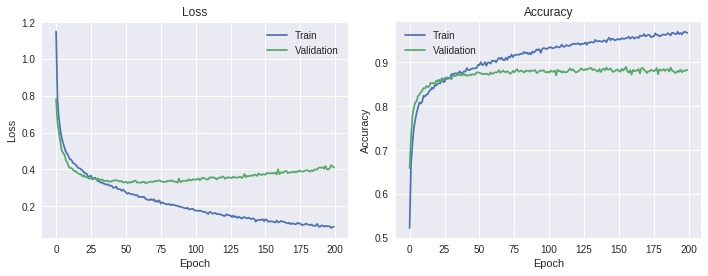

In [79]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist_improved.history['loss'])
plt.plot(hist_improved.history['val_loss'])
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist_improved.history['acc'])
plt.plot(hist_improved.history['val_acc'])
plt.legend(['Train', 'Validation'])
plt.tight_layout()
plt.show()

In [0]:
model_improved.save('my_model.h5')

Adding checkpoints so as to save the best model

In [0]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', period=1)

In [0]:
model_improved.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [94]:
hist_improved = model_improved.fit(X_train, Y_train, epochs=200, batch_size=256, validation_data=(X_test, Y_test), callbacks=[checkpoint])

Train on 6800 samples, validate on 1200 samples
Epoch 1/200
6800/6800 [==============================] - 3s 432us/step - loss: 1.0897 - acc: 0.5503 - val_loss: 0.7761 - val_acc: 0.6842
Epoch 2/200
6800/6800 [==============================] - 1s 109us/step - loss: 0.7986 - acc: 0.6568 - val_loss: 0.6471 - val_acc: 0.7283
Epoch 3/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.7102 - acc: 0.6943 - val_loss: 0.6223 - val_acc: 0.7608
Epoch 4/200
6800/6800 [==============================] - 1s 110us/step - loss: 0.6419 - acc: 0.7244 - val_loss: 0.5914 - val_acc: 0.7475
Epoch 5/200
6800/6800 [==============================] - 1s 109us/step - loss: 0.6058 - acc: 0.7496 - val_loss: 0.5686 - val_acc: 0.7917
Epoch 6/200
6800/6800 [==============================] - 1s 111us/step - loss: 0.5641 - acc: 0.7691 - val_loss: 0.5171 - val_acc: 0.8058
Epoch 7/200
6800/6800 [==============================] - 1s 108us/step - loss: 0.5317 - acc: 0.7887 - val_loss: 0.4951 - val_acc: 

In [0]:
#from google.colab import files
#files.download('example.txt') 

We have saved our best model.

In [95]:
model_improved.evaluate(X_test, Y_test)

1200/1200 [==============================] - 0s 128us/step


[0.4278047293424606, 0.875]

In [96]:
model_improved.evaluate(X_train, Y_train)

6800/6800 [==============================] - 1s 122us/step


[0.01366396603968871, 0.9991176470588236]

In [97]:
print(np.unique(XTest))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [98]:
XTest = XTest.reshape((-1, 28, 28, 1))
print(XTest.shape)

(2000, 28, 28, 1)


In [108]:
count_0 = 0
count_2 = 0
count_3 = 0
count_6 = 0
predictions = []

with open('cheshta_kwatra.csv', 'w', newline='\n') as f:
  writer = csv.writer(f)
  writer.writerow(['image_index', 'class'])
  
  for i in range(XTest.shape[0]):
    pred = model.predict_classes(XTest[i].reshape(1,28,28,1))
    if pred[0] == 0:
      count_0 += 1
      
    elif pred[0] == 1:
      pred[0] = 2
      count_2 += 1
      
    elif pred[0] == 2:
      pred[0] = 3
      count_3 += 1
      
    elif pred[0] == 3:
      pred[0] = 6
      count_6 += 1
    
    else:
      print(pred[0])
      print('--------')
      
    line = [i, pred[0]]
    writer.writerow(line)
    predictions.append(pred[0])
  
  print(len(predictions))

f.close()

2000


In [0]:
from google.colab import files
files.download('cheshta_kwatra.csv') 

In [0]:
from google.colab import files
files.download('my_model.h5') 

In [0]:
from google.colab import files
files.download('best_model.h5') 